# Regresión lineal bayesiana

## 1. Introducción

## 2. Repaso de conceptos básicos

## 3. Modelo

Supongamos que tenemos dos variables $x$ y $t$, de las cuales observamos $N$ observaciones de cada uno, es decir $\boldsymbol{x} = (x_{1},x_{2},...,x_{N})$ y $\boldsymbol{t} = (t_{1},t_{2},...,t_{N})$. Se desea predecir $t$ a través de $x$ utilizando las observaciones, a través de una función que multiplique los valores de entrada por pesos, esto es:

$$ y(x,\boldsymbol{w}) = w_{0}+w_{1}x $$

Esto es simplemente una recta con intercepto $w_{0}$ y pendiente $w_{1}$. Esto se puede extender a polinomios, ya que el modelo es lineal de sus parámetros, no de las variables.

$$ y(x, \boldsymbol{w}) = w_{0} + w_{1}x+w_{2}x^{2} +\dots+w_{M-1}x^{M-1} = \sum_{j=0}^{M-1} w_{j}x^{j} $$

Este modelo no solo se podría limitar a polinomios, sino a varios tipos de funciones, de manera que reescribimos la ecuación.

$$ y(x,\boldsymbol{w}) = w_{0}\phi_{0}(x)+w_{1}\phi_{1}(x) +w_{2} \phi_{2}(x) +\dots+w_{M}\phi_{M}(x) = \sum_{j=0}^{M-1} w_{j} \phi_{j}(x) $$

Donde $\phi_{0}(x) = 1$. Se tienen varios casos de estas funciones (_RBF_):

- Función identidad:
 - $\phi_{j}(x) = x $

- Función polinómica: 
 - $\phi_{j}(x) = x^{j} $
 
- Función gaussiana:  
 - $\phi_{j}(x) = \frac{(x_{j}-\mu_{j})^{2}}{s^{2}} $
 
- Función sigmoide:  
 - $\phi_{j}(x) = $
 
Entonces resumimos el vector $\phi(x)$.

$$ \phi(x) = [\phi_{0}(x), \phi_{1}(x), ... ,\phi_{M}(x)] $$

Y aplicado para todos los ejemplos de entrenamiento:

$$ \boldsymbol{\Phi}= \begin{pmatrix} \phi_{0}(x_{1}) & \phi_{1}(x_{1}) & \dots & \phi_{M-1}(x_{1})  \\ 
\phi_{0}(x_{2}) & \phi_{1}(x_{2}) & \dots & \phi_{M-1}(x_{2})  \\
\vdots & \vdots & \ddots & \vdots \\
\phi_{0}(x_{N}) & \phi_{1}(x_{N}) & ... & \phi_{M-1}(x_{N}) \end{pmatrix}$$

Para ajustar los parámetros utilizamos una función de error, en este caso una ampliamente utilizada que es la suma de cuadrado de los errores.

$$ E(\boldsymbol{w}) = \frac{1}{2} \sum_{n=1}^{N} \left\{\boldsymbol{w}^{T}\phi(x_{n}) - t_{n}\right\}^{2} $$

O en forma vectorial como se hará durante este proyecto.

$$ E(\boldsymbol{w}) = \frac{1}{2} \left\{\boldsymbol{w}^{T}\boldsymbol{\Phi}^{T} - \boldsymbol{t}\right\}^{T}\left\{\boldsymbol{w}^{T}\boldsymbol{\Phi}^{T} - \boldsymbol{t}\right\}  $$

Derivando esta expresión, igualando a cero para obtener $\boldsymbol{w}$ se obtiene el vector de parámetros óptimo $\boldsymbol{w}*$ que minimiza la función. Un planteamiento similar se puede hacer con respecto a la función de error añadiendo una componente de regularización que penaliza el vector de pesos, de manera de que se pueda balancear el modelo entre sesgo y varianza a medida que se ajusta el parámetro $\lambda$.

$$ E(\boldsymbol{w}) = \frac{1}{2} \left\{\boldsymbol{w}^{T}\boldsymbol{\Phi}^{T} - \boldsymbol{t}\right\}^{T}\left\{\boldsymbol{w}^{T}\boldsymbol{\Phi}^{T} - \boldsymbol{t}\right\} + \frac{\lambda}{2} \boldsymbol{w}^{t}\boldsymbol{w} $$

### 3.1. Máxima verosimilitud

Ahora vamos a añadir la incerteza del model en términos de probabilidad. Si asumimos que la variable objetivo $t$ es generada a partir de una distribución normal dado $x$, $w$ y cierto ruido aleatorio $\epsilon$. El ruido aleatorio está caracterizado por una varianza dada, que se refleja en términos de la precisión $\beta$. Y la media de esta distribución está dado por $y(x,\boldsymbol{w})$

$$ p(t|x, \boldsymbol{w}, \beta) = \mathcal{N}(t|y(x,\boldsymbol{w}),\beta^{-1}) $$

Luego si asumimos que los datos observados son independientes de esta distribución entonces la función de verosilimilitud queda determinada por la siguiente relación, a la cual le aplicamos el logaritmo para facilitar su manipulación.

$$ \ln{p(\boldsymbol{t}|\boldsymbol{x},\boldsymbol{w},\beta)} = \ln{\prod_{n=1}^{N} \mathcal{N}(t_{n}|y(x_{n},\boldsymbol{w}),\beta^{-1})} $$

$$ \ln{p(\boldsymbol{t}|\boldsymbol{x},\boldsymbol{w},\beta)} = \ln{\prod_{n=1}^{N} \sqrt{\frac{\beta}{2\pi}}\exp{\frac{ [\boldsymbol{w}^{T}\phi(x_{n})-t_{n}]^{2}\beta}{2}}} $$

$$ \ln{p(\boldsymbol{t}|\boldsymbol{x},\boldsymbol{w},\beta)} = \sum_{n=1}^{N} \ln\left\{{\sqrt{\frac{\beta}{2\pi}}\exp{\frac{ [\boldsymbol{w}^{T}\phi(x_{n})-t_{n}]^{2}\beta}{2}}}\right\} $$

$$ \ln{p(\boldsymbol{t}|\boldsymbol{x},\boldsymbol{w},\beta)} = \sum_{n=1}^{N} \ln\left\{{\sqrt{\frac{\beta}{2\pi}}}\right\} +\sum_{n=1}^{N} \ln\left\{{\exp{\frac{[\boldsymbol{w}^{T}\phi(x_{n})-t_{n}]^{2}\beta}{2}}}\right\} $$

$$ \ln{p(\boldsymbol{t}|\boldsymbol{x},\boldsymbol{w},\beta)} = \frac{\beta}{2} \sum_{n=1}^{N}[\boldsymbol{w}^{T}\phi(x_{n})-t_{n}]^{2}+\frac{N}{2}\ln{\beta}-\frac{N}{2}\ln{2\pi} $$

Luego como los dos últimos términos no dependen de $\boldsymbol{w}$, se tiene:

$$ \nabla \ln{p(\boldsymbol{t}|\boldsymbol{x},\boldsymbol{w},\beta)} = \sum_{n=1}^{N}[\boldsymbol{w}^{T}\phi(x_{n})-t_{n}]\phi(x)^{T} = [\boldsymbol{\Phi}\boldsymbol{w}-\boldsymbol{t}]^{T}\boldsymbol{\Phi} = \boldsymbol{w}^{T}\boldsymbol{\Phi}^{T}\boldsymbol{\Phi}-\boldsymbol{t}^{T}\boldsymbol{\Phi}=0 $$

Despejando $\boldsymbol{w}$ se tiene la siguiente solución, a las cuales se les llama _ecuaciones normales_.

$$ \boldsymbol{w}_{ML} = (\boldsymbol{\Phi}^{T}\boldsymbol{\Phi})^{-1}\boldsymbol{\Phi}^{T}\boldsymbol{t} $$

Reemplazando nuevamente en la ecuación se puede determinar la precisión del ruido aleatorio:

$$ \frac{1}{\beta_{ML}} = \frac{1}{N} \sum_{n=1}^{N} [\boldsymbol{w}_{ML}^{T}\phi(x_{n})-t_{n}]^{2} $$

Con todo esto podemos reformular la distribución que modela la variable objetivo $t$.

$$ p(t|x, \boldsymbol{w}_{ML}, \beta_{ML}) = \mathcal{N}(t|y(x,\boldsymbol{w}_{ML},\beta_{ML}^{-1}) $$

### 3.2. Enfoque bayesiano

Una de las interpretaciones del teorema de Bayes es la reubicación de las probabilidades a través de las posibilidades, es decir la experiencia previa se ve afectada por las observaciones. Bajo esta premisa estamos interesados en conocer la probabilidad posterior de los parámetros $\boldsymbol{w}$ por medio de las observaciones de las variables $t$ y $x$. Del teorema de Bayes y de la regla de la suma y del producto de probabilidades tenemos que la función de densidad de probabilidad a posteriori de $\boldsymbol{w}$ está dado por:

$$ p(\boldsymbol{w}|\boldsymbol{x}, \boldsymbol{t}, \alpha, \beta) = \frac {p(\boldsymbol{t}|\boldsymbol{x}, \boldsymbol{w}, \beta) p(\boldsymbol{w}|\alpha)}{\int p(\boldsymbol{t}|\boldsymbol{x}, \boldsymbol{w}, \beta) p(\boldsymbol{w}|\alpha) d\boldsymbol{w}} $$

No obstante en esta última expresión la integral del denominador resulta ser indeterminable en términos analíticos. Es por esto que se tiene que recurrir a formas conjugadas de las funciones de verosimilitud tomando en cuenta la relación:

$$ p(\boldsymbol{w}|\boldsymbol{x}, \boldsymbol{t}, \alpha, \beta) \propto p(\boldsymbol{t}|\boldsymbol{x}, \boldsymbol{w}, \beta) p(\boldsymbol{w}|\alpha) $$

Para esto primero establecemos una probabilidad a priori. Como supuesto establecemos que es una distribución normal con media $\boldsymbol{m_{0}}$ y covarianza $\boldsymbol{S_{0}}$. 

$$ p(\boldsymbol{w}|\boldsymbol{m}_{0},\boldsymbol{S}_{0}) = \mathcal{N}(\boldsymbol{w}|\boldsymbol{m}_{0},\boldsymbol{S}_{0}) $$

Luego, como esta distribución a priori es conjugada de la función de verosimilitud, la distribución a posteriori corresponde entonces a una normal con parámetros definidos por su conjugación.

$$ p(\boldsymbol{w}|\boldsymbol{m}_{N},\boldsymbol{S}_{N}) = \mathcal{N}(\boldsymbol{w}|\boldsymbol{m}_{N},\boldsymbol{S}_{N}) $$

$$ \boldsymbol{m}_{N} = \boldsymbol{S}_{N}\left(\boldsymbol{S}_{0}^{-1}\boldsymbol{m}_{0}+\beta\boldsymbol{\Phi}^{T}\boldsymbol{t}\right) $$

$$ \boldsymbol{S}_{N} = \boldsymbol{S}_{0}^{-1} +\beta\boldsymbol{\Phi}^{T}\boldsymbol{\Phi} $$


Finalmente para predecir la variable $t$ con un nuevo valor se debe resolver la siguiente relación. Acá distinguimos los valores a predecir $\{t,x\}$, de las observaciones para el entrenamiento $\{\boldsymbol{t},\boldsymbol{x}\}$.

$$ p(t|x,\boldsymbol{x},\boldsymbol{t}) = \int p(t|x,\boldsymbol{w})p(\boldsymbol{w}|\boldsymbol{x},\boldsymbol{t})\,d\boldsymbol{w} $$

## 4. Programando el modelo

Como es usual prescindiremos de librerías, reconstruyendo el algoritmo paso a paso mediante funciones. No obstante para facilitar operaciones matriciales y estructuras de datos se ocupará `numpy`. Se omitirá utilizar clases y objetos, sin embargo después se condensarán en otro archivo en este repositorio.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

Ocuparemos una clase para instanciar objetos que sirvan de base para almacenar distribuciones normales, computar sus funciones o muestrear desde ellas.

In [2]:
class Distribucion_Normal:
    def __init__(self, media, varianza):
        self.media = media
        self.dimension = self.media.shape[0]
        self.varianza = varianza
        
    def densidad_probabilidad(self, x):
        """Computa la densidad de probabilidad para un punto dado X
        Parámetros:
        -----------
        x : escalar o vector de puntos a evaluar
        
        Return:
        -----------
        p : devuelve el valor de la pdf de una distribución gaussiana
        
        
        """
        determinante_varianza = np.linalg.det(self.varianza)
        inversa_varianza = np.linalg.inv(self.varianza)
        return (1/(((2*np.pi)**(self.dimension/2))*(determinante_varianza**0.5)))  \
                *np.exp(-0.5*(((x-self.media)**2).dot(inversa_varianza)).sum(axis=1))
    
    @staticmethod
    def densidad_probabilidad_escalar(mu, var, x):
        return ((1/(var*2*np.pi))**0.5)*np.exp(-(0.5/var)*(x-mu)**2)
        
    def plot_densidad_probabilidad_2d(self):
        """Gráfico de la densidad de probabilidad para dimensión D = 2"""
        
        x1 = np.linspace(start = self.media[0] - 2*(self.varianza[0,0]**0.5), stop = self.media[0] + 2*(self.varianza[0,0]**0.5), num = 50)
        x2 = np.linspace(start = self.media[1] - 2*(self.varianza[1,1]**0.5), stop = self.media[1] + 2*(self.varianza[1,1]**0.5), num = 50)
        X1, X2 = np.meshgrid(x1, x2)
        X1, X2 = X1.ravel(), X2.ravel()
        Z = self.densidad_probabilidad(np.array([X1, X2]).T).reshape(50,50)
        X1, X2 = X1.reshape(50,50), X2.reshape(50,50)
        
        fig, ax = plt.subplots()
        cs = ax.contourf(X1, X2, Z, cmap=cm.inferno, levels = 100)
        cbar = fig.colorbar(cs)
        plt.show()
        

    def muestrear(self):
        return np.random.multivariate_normal(self.media, self.varianza)

    

Ahora un par de funciones que sirvan como funciones bases para las predicciones, es decir $\phi_{j}(x)$

In [3]:
def funcion_gaussiana(x, mu, s):
    
    phi = np.array([[np.exp(-0.5*(j-k)**2/(s**2)) for k in mu] for j in x])
    phi = np.concatenate((np.ones(shape=[phi.shape[0],1]), phi), axis = 1)
    return phi

def funcion_polinomica(x, M):
    phi = np.array([[j**i for i in range(M)] for j in x])
    return phi

En primera instancia probaremos las ecuaciones normales, que resuelven los pesos por estimación de máxima verosimilitud apoyándose en álgebra matricial. Servirá para datasets pequeños, pero será problemático para matrices de entrenamientos de miles de datos.

In [4]:
def ecuaciones_normales(phi, t):
    return np.linalg.inv(phi.T.dot(phi)).dot(phi.T).dot(t)

Hará falta la gestión de parámetros para determinar la distribución _a posteriori_ dadas las observaciones.

In [5]:
def normal_posteriori(mu_0, S_0, beta, phi, t):
    S_0_inverso = np.linalg.inv(S_0)
    
    S_n_inverso = S_0_inverso + beta*phi.T.dot(phi)
    
    S_n = np.linalg.inv(S_n_inverso)
    
    mu_n = S_n.dot((S_0_inverso.dot(mu_0) + beta*phi.T.dot(t)))
    
    posteriori = Distribucion_Normal(mu_n, S_n)
    
    return posteriori

Y por último genererar un par de datasets con algo de ruido estocástico.

In [6]:
def generar_datos_seno(N, sigma = 0.1):
    """Genera datos de entrenamiento"""
    
    X = np.random.random(N)
    Y = np.sin(2*np.pi*X) + np.random.normal(loc = 0.0, scale = sigma, size = N)
    return X, Y
def generar_datos_recta(N, sigma = 0.1):
    X = np.random.random(N)
    Y = 0.15 + 0.3 * X + np.random.normal(loc = 0.0, scale = sigma, size = N)
    return X, Y

In [7]:
def plot_aprendizaje_bayesiano(x1, Y, w0, w1, z1, mu_distribucion_predictiva, sigma_distribucion_predictiva, 
                               verosimilitud = None, t_train = None, x_train = None):
    fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(15,5))
    if verosimilitud is not None:
        axs[0].contourf(w0, w1, verosimilitud, levels = 50, cmap = cm.plasma)
    axs[1].contourf(w0, w1, z1, levels = 50, cmap = cm.plasma)

    for i in range(n_muestreos):
        axs[2].plot(x1, Y[i,:], c = 'r')
    if t_train is not None and x_train is not None:
        axs[2].scatter(x_train, t_train, marker = 'o', s= 100)
    axs[2].set_xlim(0, 1.0)
    axs[2].set_ylim(0, 1.0)
    axs[2].plot(x1, mu_distribucion_predictiva, linewidth= 5, color = 'purple')
    axs[2].fill_between(x1, mu_distribucion_predictiva-sigma_distribucion_predictiva,mu_distribucion_predictiva+sigma_distribucion_predictiva,alpha=0.2, color= 'orange')
    fig.tight_layout()
    plt.show()

# 5. Aplicación

## 5.1. Aproximando la función seno

Empecemos por probar lo programado. Instanciemos una distribución bivariada normal con parámetros $\boldsymbol{\mu}$ centrados en 0 y $\boldsymbol{\Sigma}$ diagonal, es decir isotrópica. Luego vemos su densidad de probabilidad proyectada en 2D, la cual es esférica por ser isotrópica.

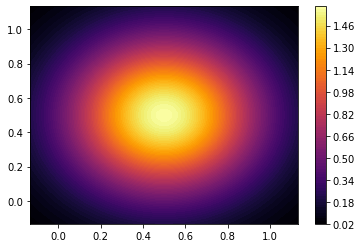

In [8]:
mu1 = np.array([0.5, 0.5])
sigma1 = np.array([[0.1, 0.0],[0.0, 0.1]])
priori = Distribucion_Normal(mu1, sigma1)
priori.plot_densidad_probabilidad_2d()

Generemos unos 20 datos de la función seno, almacenandolos en el par de vectores $\{\boldsymbol{t},\boldsymbol{x}\}$. Para apreciar los puntos y la recta desde la cual se generaron se grafican.

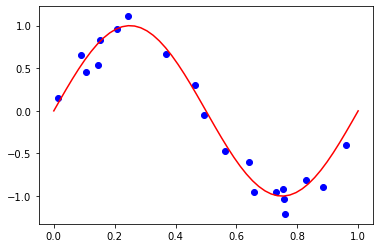

In [9]:
x,t = generar_datos_seno(20)
x1 = np.linspace(0,1,50)
t1 = np.sin(2*np.pi*x1)
plt.scatter(x, t, c = 'b')
plt.plot(x1, t1, c = 'r')
plt.show()

Establezcamos la función de regresión en 5 RBF gaussianas, es decir el vector $\boldsymbol{w}$ debe tener 6 elementos contando al intercepto, los cuales iniciaremos aleatoriamente por el momento. Las medias $\mu_{j}$ se inicializan equidistantes en el rango $[0, 1]$, con desviación estándar $s = 0.2$. Luego, obtenemos los puntos mediante $\boldsymbol{y} = \boldsymbol{\Phi} \boldsymbol{w}$. Como los pesos no están ajustados es una curva imprecisa y que no predice aún.

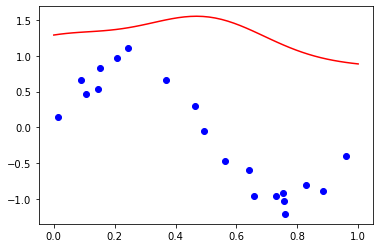

In [10]:
#Probando con 5 RBF gaussianas
w = np.random.random(6)
mu = np.linspace(0,1,num = 5)
s = 0.2

y1 = funcion_gaussiana(x1, mu, s).dot(w)
plt.plot(x1, y1, c = 'r')
plt.scatter(x, t, c = 'b')
plt.show()

Ahora probemos obtener $\boldsymbol{w}_{ML}$ mediante las ecuaciones normales. Este es un modelo propuesto complejo y probablemente está caracterizado por _overfitting_ puesto que la curva de regresión se ajusta muy bien a los puntos. De todas maneras las RBF gaussianas emulan bastante bien el proceso que genera los puntos, es decir a la función seno. Sin embargo esto no es algo que vayamos a saber siempre.

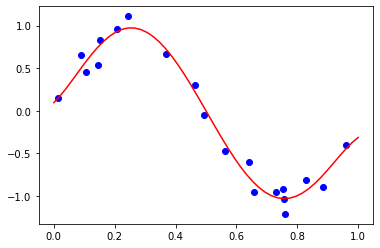

In [11]:
#Resolviendo por ecuaciones normales, RBF polinómica grado 6
w_ml = ecuaciones_normales(funcion_polinomica(x, 6), t)

x1 = np.linspace(0,1, num = 50)
y1 = funcion_polinomica(x1, 6).dot(w_ml)

plt.plot(x1, y1, c = 'r')
plt.scatter(x, t, c= 'b')
plt.show()

## 5.2. Aproximando a una recta

En esta sección ocuparemos el conjugado para una configuración Normal-Normal y así determinar la distribución posterior de $\boldsymbol{w}$. Primero generamos datos de una recta $a_{0} + a_{1}X$, donde $a_{0}=0.15$ y $a_{1} = 0.3$. Generamos unos 50 puntos uniformemente distribuidos en el intervalo $[0,1]$ y le agregamos ruido aleatorio.

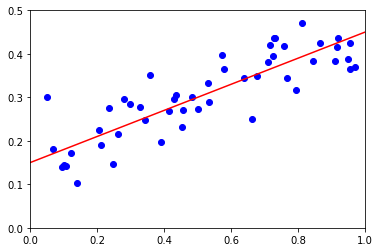

In [12]:
#Generando datos en recta
x,t = generar_datos_recta(50, sigma = 0.05)
x1 = np.linspace(0, 1, 50)
t1 = 0.15 + 0.3 * x1
plt.scatter(x, t, c = 'b')
plt.plot(x1, t1, c = 'r')
plt.ylim(0, 0.5)
plt.xlim(0, 1.0)
plt.show()

Establecemos una distribución priori de $\boldsymbol{w}$. Esta será normal bivariada centrada en 0, con la matriz covarianza $\boldsymbol{\Sigma} = \alpha^{-1} \boldsymbol{I}$, esto es un campana de Gauss isotrópica. Similarmente la verosimilitud será normal con media $\boldsymbol{\Phi w}$ y con varianza igual a $\frac{1}{\beta}$

In [13]:
#Estableciendo distribucion priori de pesos w
mu_pesos = np.array([0, 0])
alfa = 2
sigma_pesos = (alfa**-1)*np.array([[1, 0],[0, 1]])

#Verosimilitud
beta = 25

Como primer paso evaluamos esta distribución a priori sobre una grilla con $w_{0}$ en el eje X y $w_{1}$ en el eje Y en el plano cartesiano. Esto podemos hacerlo pues es un modelo simple de dos parámetros, pero no tendrá mucha utilidad en un modelo hiperdimensional. En el primer gráfico mostramos sus densidades de probabilidades según el modelo propuesto. En el segundo gráfico esbozamos 10 rectas (rojas), sobre la base de 10 valores muestreados del vector $\boldsymbol{w}$ según su distribución. También se muestra el valor esperado del vector $\boldsymbol{\Phi}\boldsymbol{w}_{MAP}$. El área naranja muestra su incerteza a través de $\pm \sqrt{\sigma_{N}} $

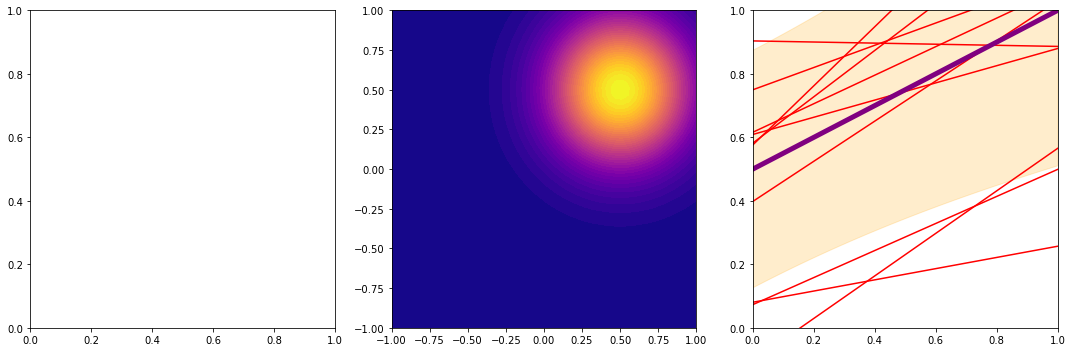

In [14]:
#Paso 0: prior


w0 = np.linspace(-1, 1, num=50)
w0, w1 = np.meshgrid(w0, w0)
w0, w1 = w0.ravel(), w1.ravel()
z1 = priori.densidad_probabilidad(np.array([w0, w1]).T).reshape(50,50)
w0, w1 = w0.reshape(50,50), w1.reshape(50,50)

# 10 Muestreos de w
n_muestreos = 10
Y = np.zeros((n_muestreos, 50))
for i in range(n_muestreos):
    w_muestreados = priori.muestrear()
    Y[i, :] = funcion_polinomica(x1,2).dot(w_muestreados)

#Distribución predictiva
sigma_distribucion_predictiva = (1/beta + np.multiply(funcion_polinomica(x1, 2).dot(priori.varianza),
                                                      funcion_polinomica(x1,2)).sum(axis=1))**0.5
mu_distribucion_predictiva = priori.media.dot(funcion_polinomica(x1, 2).T)


#Graficos
plot_aprendizaje_bayesiano(x1, Y, w0, w1, z1, mu_distribucion_predictiva, sigma_distribucion_predictiva)

Ahora utilizamos un solo ejemplo de entrenamiento, el cual sale en el gráfico de la izquierda en un punto azul. Con este punto actualizamos la distribución a priori mediante el teorema de Bayes. En el gráfico de la izquierda aparece la verosimilitud dados los datos que observamos suponiendo cada hipótesis de $\boldsymbol{w}$ en el espacio. Como se puede apreciar la distribución normal se vuelve mas confidente concentrándose en un área mas pequeña en el gráfico de al medio. Adicionalmente las rectas rojas se acercan mas al punto azul, y el área sombreada se empequeñece.

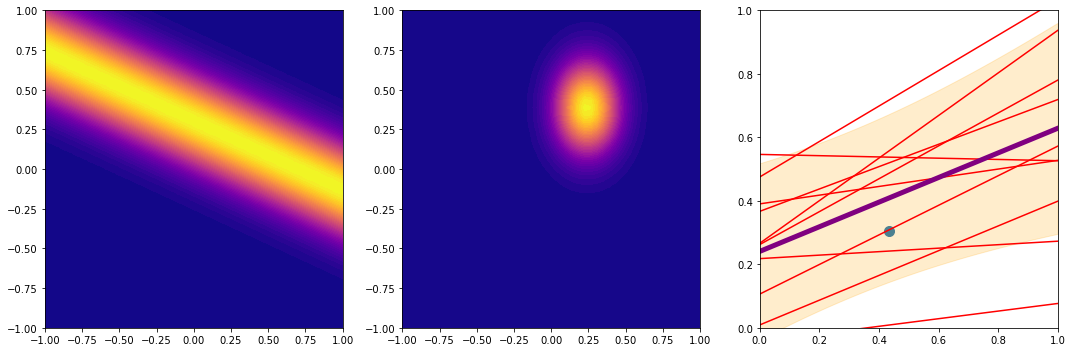

In [15]:
#Paso 1: 1 dato adicional
x_train, t_train = np.array(x[0]).reshape(1), np.array(t[0]).reshape(1)
posteriori = normal_posteriori(priori.media, priori.varianza, 25, funcion_polinomica(x_train, 2), t_train)

w0, w1 = w0.ravel(), w1.ravel()
z1 = posteriori.densidad_probabilidad(np.array([w0, w1]).T).reshape(50,50)
w0, w1 = w0.reshape(50,50), w1.reshape(50,50)

#Verosimilitud
verosimilitud = ((beta/(2*np.pi))**0.5)*np.exp(-0.5*beta*(t_train - np.array([w0, w1]).T.dot(funcion_polinomica(np.array(x_train[None]), 2)))**2).reshape(50,50)

#Distribución predictiva
sigma_distribucion_predictiva = (1/beta + np.multiply(funcion_polinomica(x1, 2).dot(posteriori.varianza),funcion_polinomica(x1,2)).sum(axis=1))**0.5
mu_distribucion_predictiva = posteriori.media.dot(funcion_polinomica(x1, 2).T)
                                             

# 10 Muestreos de w
n_muestreos = 10
Y = np.zeros((n_muestreos, 50))
for i in range(n_muestreos):
    w_muestreados = posteriori.muestrear()
    Y[i, :] = funcion_polinomica(x1,2).dot(w_muestreados)
    
#Graficos
plot_aprendizaje_bayesiano(x1, Y, w0, w1, z1, mu_distribucion_predictiva, sigma_distribucion_predictiva, 
                           verosimilitud, t_train, x_train)

Ahora ocupamos los 5 puntos siguientes. La verosimilitud y la densidad de probabilidad se concentran en áreas mas pequeñas del espacio muestral, lo que nos dice que la dispersión ha bajado. Similarmente las rectas rojas se orientan cada vez mas homogéneamente.

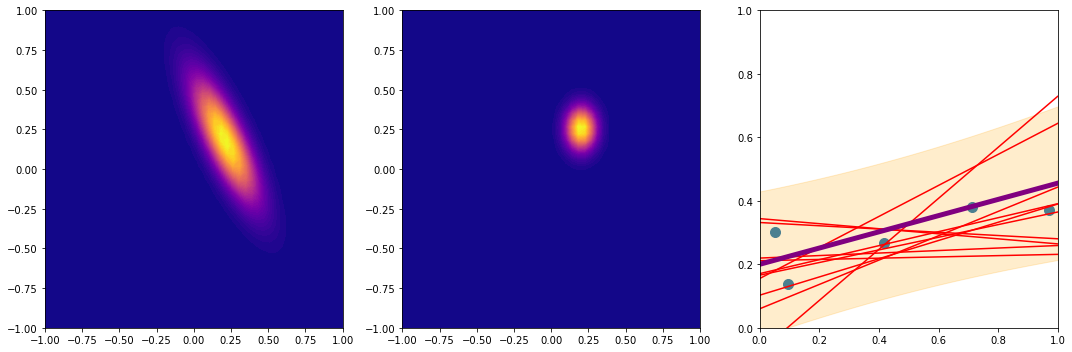

In [16]:
#Paso 2: 5 datos adicionales
x_train, t_train = np.array(x[1:6]), np.array(t[1:6])
posteriori = normal_posteriori(posteriori.media, posteriori.varianza, 25, funcion_polinomica(x_train, 2), t_train)
w0, w1 = w0.ravel(), w1.ravel()
z1 = posteriori.densidad_probabilidad(np.array([w0, w1]).T).reshape(50,50)


#Verosimilitud
verosimilitud = ((beta/(2*np.pi))**0.5)*np.exp(-0.5*beta*(t_train - np.array([w0, w1]).T.dot(funcion_polinomica(np.array(x_train), 2).T))**2)
verosimilitud = verosimilitud.prod(axis = 1).reshape(50,50)

w0, w1 = w0.reshape(50,50), w1.reshape(50,50)

#Distribución predictiva
sigma_distribucion_predictiva = (1/beta + np.multiply(funcion_polinomica(x1, 2).dot(posteriori.varianza),funcion_polinomica(x1,2)).sum(axis=1))**0.5
mu_distribucion_predictiva = posteriori.media.dot(funcion_polinomica(x1, 2).T)

# 10 Muestreos de w
n_muestreos = 10
Y = np.zeros((n_muestreos, 50))
for i in range(n_muestreos):
    w_muestreados = posteriori.muestrear()
    Y[i, :] = funcion_polinomica(x1,2).dot(w_muestreados)

#Graficos
plot_aprendizaje_bayesiano(x1, Y, w0, w1, z1, mu_distribucion_predictiva, sigma_distribucion_predictiva, 
                           verosimilitud, t_train, x_train)

Ahora ocupamos el resto de los ejemplos de entrenamientos. Tanto la verosimilitud como la densidad están muy acotadas al verdadero valor de $\boldsymbol{w}$, lo cual nos dice que la incerteza decreció mucho ahora que tomamos en cuenta muchas observaciones. Ahora las rectas están muy cercas y tienen casi la misma orientación. El área sombreada ahora está en valores mínimos, lo que nos dice que ahora solo observamos el ruido aleatorio del proceso que generó los datos (que si recordamos bien es $\beta^{-1} = 0.2$

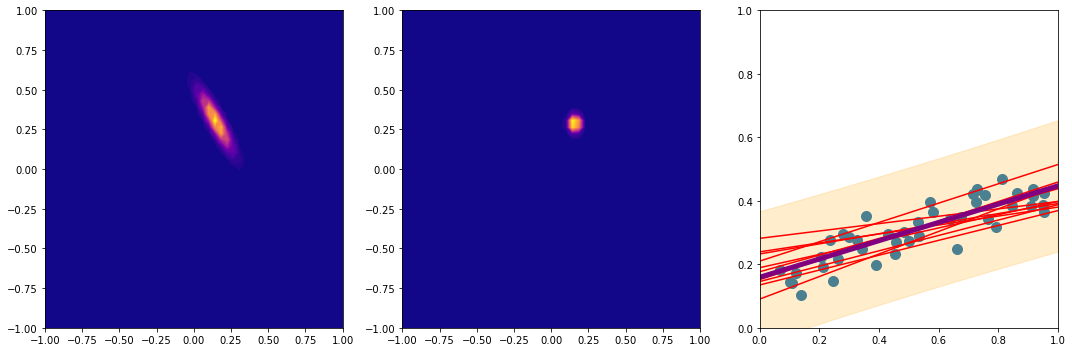

In [17]:
#Paso 3: 14 datos adicionales
x_train, t_train = np.array(x[6:]), np.array(t[6:])
posteriori = normal_posteriori(posteriori.media, posteriori.varianza, 25, funcion_polinomica(x_train, 2), t_train)
w0, w1 = w0.ravel(), w1.ravel()
z1 = posteriori.densidad_probabilidad(np.array([w0, w1]).T).reshape(50,50)


#Verosimilitud
verosimilitud = ((beta/(2*np.pi))**0.5)*np.exp(-0.5*beta*(t_train - np.array([w0, w1]).T.dot(funcion_polinomica(np.array(x_train), 2).T))**2)
verosimilitud = verosimilitud.prod(axis = 1).reshape(50,50)
w0, w1 = w0.reshape(50,50), w1.reshape(50,50)

#Distribución predictiva
sigma_distribucion_predictiva = (1/beta + np.multiply(funcion_polinomica(x1, 2).dot(posteriori.varianza),funcion_polinomica(x1,2)).sum(axis=1))**0.5
mu_distribucion_predictiva = posteriori.media.dot(funcion_polinomica(x1, 2).T)

# 10 Muestreos de w
n_muestreos = 10
Y = np.zeros((n_muestreos, 50))
for i in range(n_muestreos):
    w_muestreados = posteriori.muestrear()
    Y[i, :] = funcion_polinomica(x1,2).dot(w_muestreados)

#Graficos
plot_aprendizaje_bayesiano(x1, Y, w0, w1, z1, mu_distribucion_predictiva, sigma_distribucion_predictiva, 
                           verosimilitud, t_train, x_train)